# Polynomial Regression(다항 회귀)

> Houston에서 주행 거리에 따른 Volvo의 가격

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [45]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DAT/data/true_car_listings.csv")
# print(dataset)

dataset = dataset[dataset["Make"] == "Volvo"]
dataset = dataset[dataset["City"] == "Houston"]

print(dataset.isna().sum()) # 결측치 확인

X = dataset.iloc[:, 2].values
y = dataset.iloc[:, 0].values
X = X.reshape(-1, 1)
# print(X)
# print(y)

Price      0
Year       0
Mileage    0
City       0
State      0
Vin        0
Make       0
Model      0
dtype: int64


> Simple Lenear Regression(단순 선형 회귀)

In [46]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

> 데이터 시각화(전체)

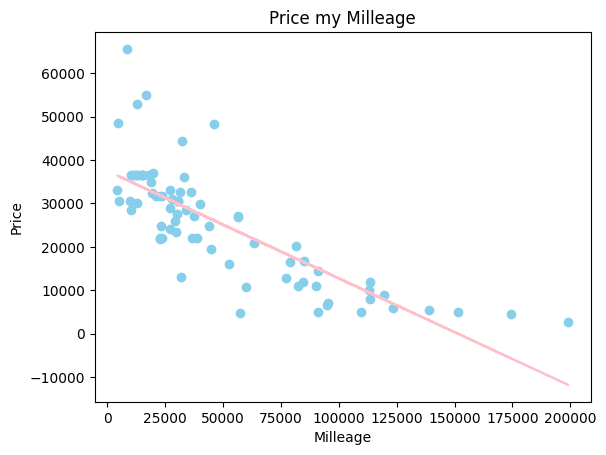

In [47]:
plt.scatter(X, y, color = "skyblue") # 산점도
plt.plot(X, reg.predict(X), color = 'pink') # 선 그래프
plt.title("Price my Milleage") # 제목
plt.xlabel("Milleage")
plt.ylabel("Price")
plt.show()

In [48]:
reg.score(X, y) # 전체 데이터를 통한 모델 평가

0.6306695276703567

> Polynomial Regression(다항 회귀)

In [49]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3) # 차
X_poly = poly_reg.fit_transform(X)
# fit: 새롭게 만들 피처들의 조합
# transform: 실제로 데이터를 변환
print(f"X_poly: {X_poly[:5]}")
print(f"X: {X[:5]}")
# [x] -> [x^0, x^1, x^2] -> 3dlfkaus [1, 3, 9]으로 변환

X_poly: [[1.00000000e+00 5.74000000e+04 3.29476000e+09 1.89119224e+14]
 [1.00000000e+00 6.01960000e+04 3.62355842e+09 2.18123722e+14]
 [1.00000000e+00 9.10650000e+04 8.29283422e+09 7.55186949e+14]
 [1.00000000e+00 9.51090000e+04 9.04572188e+09 8.60329562e+14]
 [1.00000000e+00 1.09684000e+05 1.20305799e+10 1.31956212e+15]]
X: [[ 57400]
 [ 60196]
 [ 91065]
 [ 95109]
 [109684]]


In [50]:
poly_reg.get_feature_names_out()

array(['1', 'x0', 'x0^2', 'x0^3'], dtype=object)

In [51]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y) # 변환된 X와 y를 가지고 모델 생성(학습)

LinearRegression()

> 데이터 시각화(변환된 X와 y)

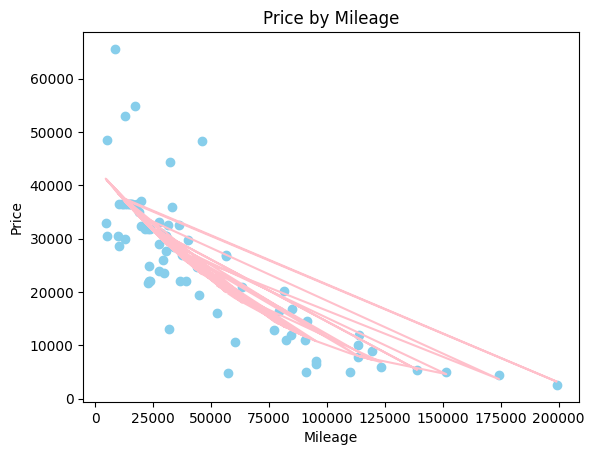

In [52]:
plt.scatter(X, y, color = "skyblue")
plt.plot(X, lin_reg.predict(poly_reg.fit_transform(X)),color = "pink")
plt.title("Price by Mileage")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

In [53]:
X_range = np.arange(min(X), max(X), 0.1)
# X의 최소값에서 최대값까지의 범위를 0.1 단위로 잘라서 데이터를 생성
print(X_range)
print(X_range.shape)

[  4449.           4449.1          4449.2        ... 199075.70000071
 199075.80000071 199075.90000071]
(1946270,)


In [54]:
X_range = X_range.reshape(-1, 1)
# X_range = X_range.reshape(len(X_range), 1)
# row 개수는 자동으로 계산, column 개수는 1개
print(X_range.shape)

(1946270, 1)


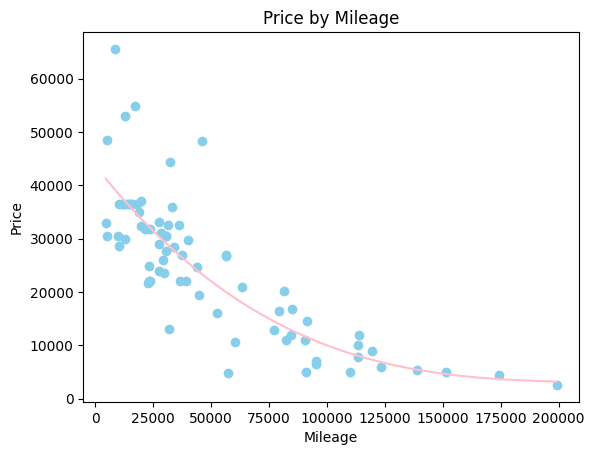

In [55]:
plt.scatter(X, y, color = "skyblue")
plt.plot(X_range, lin_reg.predict(poly_reg.fit_transform(X_range)),color = "pink")
plt.title("Price by Mileage")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

> 주행 거리에 따른 가격 예측

In [56]:
reg.predict([[10000]])
# 10000마일 주행했을 때 선형 회귀 모델의 예측

array([35040.6970798])

In [57]:
lin_reg.predict(poly_reg.fit_transform([[2]]))
# 10000마일 주행했을 때 다항 회귀 모델의 예측

array([43653.16880898])

In [58]:
lin_reg.score(X_poly, y)
# degree = 4 -> 0.67686285314426
# degree = 3 -> 0.6899898423263894
# degree = 2 -> 0.6887947914887079

0.6899898423263894